# Error en el error

Material en construcción, Edgar Rueda, febrero 2021

**Conocimientos previos recomendados**
- Concepto variable aleatoria.
- El concepto de distribución gaussiana.
- El concepto de media y desviación estándar.
- Teorema del límite central.
- Concepto de error estándar

**Bibliografía**
- Hughes, I., & Hase, T. (2010). Measurements and their uncertainties: a practical guide to modern error analysis. Oxford University Press.

- Squires, G. L. (2001). Practical physics. Cambridge university press.



In [ ]:
#@title Código: librerías
import numpy as np
import pylab as plt

##1. Introducción
En el concepto de error estándar finalmente concluímos que la mejor opción que teníamos para reportar el valor de una variable experimental $X$ que fluctua en las $n$ medidas que hicimos era hallar el promedio $\bar x$ de las $n$ variables y reportar la variable con su incertidumbre, con una confiabilidad del 68%, como

$$ X = \bar x \pm \frac{s}{\sqrt n} \quad (1)$$

donde $s^2$ es la varianza de la muestra. 

Ahora el problema que tenemos es definir cuantas cifras significativas deberíamos usar para reportar el error, dado que sabemos que estamos cometiendo un "error" al determinarlo debido a que nuestra muestra $n$ es menor al tamaño de la población de la distribución gaussiana. Esto es lo que se conoce como error en el error.



##2. Error relativo en el error
Dado que nuestra distribución es gaussiana se puede deducir una fórmula que nos diga cuál es el error relativo que estamos cometiendo en la determinación del error, y está dado por la siguiente expresión:

$$ \frac{1}{\sqrt{2n-2}} \quad (2) $$

Graficamente sería:

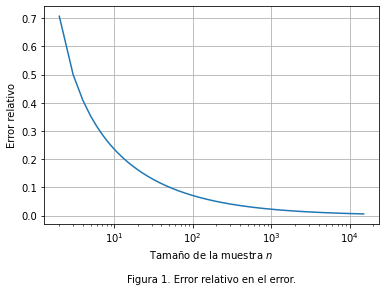

In [ ]:
#@title Código:
n = np.arange(2,15000,1)
ee = 1/(np.sqrt(2*n-2))

fig, ax=plt.subplots()
ax.plot(n,ee)
ax.set_xscale('log')
ax.set_ylabel('Error relativo')
ax.set_xlabel('''Tamaño de la muestra $n$

Figura 1. Error relativo en el error.''')
plt.grid()
plt.show()

Analicemos algunos valores de la figura 1. Supongamos que el error que obtuvimos es $2.354813$ y queremos saber dado el número de datos que tomamos cuantas cifras significativas deberíamos reportar. 
- Caso de $n=5$: el error relativo es del $35 \%$ que corresponde a $0.824$. Este valor puede modificar incluso la primera cifra significativa del error, por lo que la opción más indicada es reportar el error con una sola cifra significativa, $2$.

- Caso de $n=10$: el error relativo es del $24 \%$ que corresponde a $0.565$. Este valor tambien modifica la primera cifra significativa del error, por lo que la opción más indicada es reportar el error con una sola cifra significativa, $2$.

- Caso de $n=100$: el error relativo es del $7.1 \%$ que corresponde a $0.167$. Este valor no modifica la primera cifra significativa del error, pero si la segunda, por lo que la opción más indicada es reportar el error con hasta dos cifras significativas, $2.4$, pero preferiblemente con una, $2$.

- Caso de $n=1200$: el error relativo es del $2.0 \%$ que corresponde a $0.048$. Este valor no modifica la primera y segunda cifra significativa del error, pero si la tercera, por lo que la opción más indicada es reportar el error con máximo tres cifras significativas, $2.35$, pero preferiblemente con dos, $2.4$.



Note que tuvimos que llegar a 1200 datos para comenzar a reportar con certeza el error con dos cifras significativas; **como  regla general debemos reportar el error con una sola cifra significativa, y solo casos especiales con dos**.


**Nota**: realice este ejercicio para otro valor de error y determine cuantas medidas necesita para poder reportarlo con dos cifras significativas.

##3. La excepción a la regla con el número 1
Cuándo la primera cifra significativa es 1, por ejemplo $1.31$ o $1.51$ al reportar una sola cifra significativa podemos inducir un error importante, por ejemplo, si para el error $1.31$ reportamos $1$ el error inducido es del $24\%$, y si para el error $1.51$ reportamos $2$ el error inducido es del $33\%$, por lo que se recomienda **cuando la primera cifra significativa del error es uno reportar dos cifras significativas en el error**. Para el ejemplo sería $1.3$ y $1.5$ respectivamente.

## 4. ¿Entonces con cuantas cifras significativas reporto el error?
Basados en lo que nos dice el error en el error podemos reportar la incertidumbre con las cifras significativas que queramos siempre y cuando tomemos el número adecuado de medidas. En la realidad hay otras consideraciones que limitan el número de cifras significativas en el error, y que expondremos a continuación:

1. La primera es lo que en general se acepta en la comunidad científica. Y básicamente lo que dice es que la incertidumbre se debe reportar con una cifra significativa, excepto en casos especiales y cuando se han hecho un número significativo de medidas que permiten reportar dos cifras significativas en la incertidumbre. Reportar tres cifras no es aceptado, se tendría que dar una justificación importante, y en general no tiene sentido: imagine que reporta el siguiente valor $543 \pm 302$, luego usted solo tiene una certeza del 68% de probabilidad de que su valor estimado está entre $243$ y $843$, ¿tiene alguna diferencia significativa decir que está entre $241$ y $845$? realmente no.

2. La segunda razón es que llega un momento donde no tiene sentido tomar más medidas porque ya la incertidumbre generada por la resolución (apreciación) del equipo no permite mejorar la precisión. Miremos un ejemplo:

Supongamos que pretendemos medir un voltaje con un multímetro que tiene una resolución de $1 \ \text{mV}$, que le asignaremos una incertidumbre aproximada de la mitad de la resolución $\alpha_R =\pm 0.5 \ \text{mV}$, y la pregunta que nos hacemos es ¿cuántas mediciones tiene sentido hacer?. Para poder responder esto haremos una tabla con el cuadrado de las incertidumbres y su suma para ver cuando es más significativa la incertidumbre de las fluctuaciones ($\alpha_{ds}$), y cuando la incertidumbre de la resolución ($\alpha_R$). $N$ corresponde al número de medidas y $\alpha_V$ es la incertidumbre que finalmente se reportaría.

N|$\alpha_{ds}^2$ | $\alpha_R^2$|$\alpha_{ds}^2+\alpha_R^2$ |$\alpha_V$ (mV)
-|-|-|-|-
|||<img width=60/>
2|0.250|0.250|0.500|0.7
3|0.111|0.250|0.361|0.6
4|0.083|0.250|0.333|0.6
5|0.140|0.250|0.390|0.6
6|0.133|0.250|0.383|0.6
7|0.095|0.250|0.345|0.6
8|0.071|0.250|0.321|0.6
9|0.068|0.250|0.320|0.6
10|0.054|0.250|0.304|0.6
11|0.045|0.250|0.295|0.5
15|0.037|0.250|0.286|0.5
20|0.026|0.250|0.276|0.5

La conclusión que podemos sacar de la tabla es que a partir de 11 mediciones la incertidumbre debida a las fluctuaciones es despreciable en comparación con la incertidumbre generada por la resolución del equipo. Entonces no tiene sentido medir más, y obviamente nunca tendremos suficientes medidas como para reportar con dos cifras significativas la incertidumbre.

Si finalmente decidimos hacer 10 medidas el valor a reportar sería $282.1 \pm 0.6 \ \text{mV}$.

En algunos casos es posible que la resolución del equipo sea tan buena que aún para todas las medidas que hagamos podemos despreciar la incertidumbre debida a la resolución del equipo. Para el ejemplo anterior un multímetro con una resolución de $0.2 \ \text{mV}$ generaría una incertidumbre despreciable para el máximo de medidas hechas que fue 20.

In [ ]:
#@title Código...
volts = 1000*np.array([.282,.281,.281,.282,.283,.283,.282,.282,.283,.282,
                      .282,.281,.281,.282,.281,.281,.282,.282,.281,.281]) #en mV

N = 10
V_R = 0.5
V_std = np.std(volts[0:N],ddof=1)/np.sqrt(N)
suma = V_R**2 + V_std**2
print('V_std**2',V_std**2,'suma',suma,'resul',np.sqrt(suma))

Vest = np.mean(volts[0:N])
print('Vest',Vest)

V_std**2 0.05444444444444442 suma 0.3044444444444444 resul 0.5517648452415616
Vest 282.1


**Una sola medida con el multímetro**

Si por alguna razón solo pudiéramos hacer una medida con el multímetro la incertidumbre se debe reportar usando la información dada por el fabricante, que para el caso del multímetro usado es $\pm(0.5\% + 3)$. El valor en porcentaje ($0.5\%$) refleja la incertidumbre relativa al valor medido, mientras que el dígito ($3$) refleja la incertidumbre en el dígito menos significativo del valor medido.

Si el valor medido fue $282 \ \text{mV}$, en una escala donde la resolución del multímetro es de $1 \ \text{mV}$ (esto se dedude porque el mínimo valor que reporta el multímetro en este caso es la unidad, y lo hace de uno en uno), la incertidumbre se calcula como:

$$ \alpha_V = 282\times 0.005 \ \text{mV} + (1\times 3) \ \text{mV} $$
$$ \alpha_V = 1.41 \ \text{mV} + 3 \ \text{mV} $$
$$ \alpha_V = 4.41 \ \text{mV} $$

Y el valor finalmente reportado es $V = 282 \pm 4 \ \text{mV}$.
